In [1]:
import warnings
import os
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor, KerasClassifier

# Ignoring future warnings and deprecation warnings so as not to make the notebook full of warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/raw/VN_housing_dataset.csv')
df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


In [3]:
print("The total records of the dataset are: ", str(len(df)), "records.")

The total records of the dataset are:  82497 records.


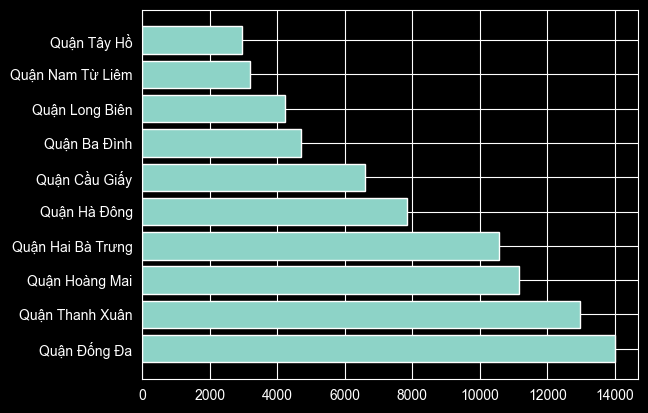

In [4]:
x = df['Quận'].value_counts().keys()

plt.barh(x[:10], df['Quận'].value_counts()[:10]);

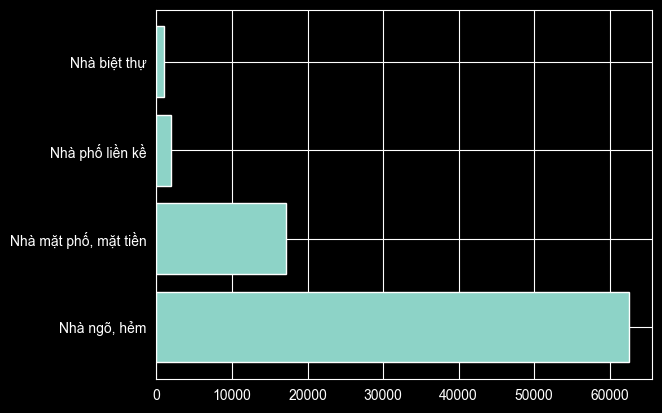

In [5]:
x = df['Loại hình nhà ở'].value_counts()
plt.barh(x.keys(), x);

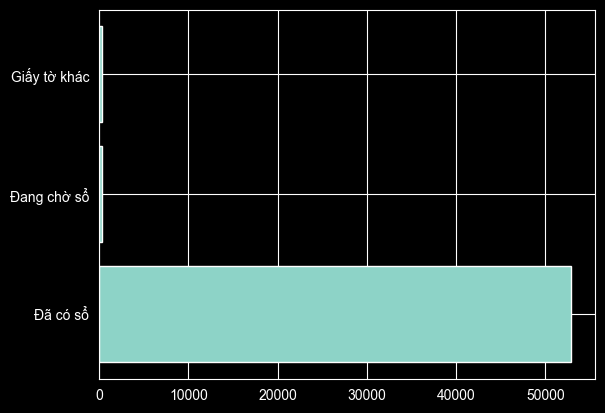

In [6]:
x = df['Giấy tờ pháp lý'].value_counts()
plt.barh(x.keys(), x);

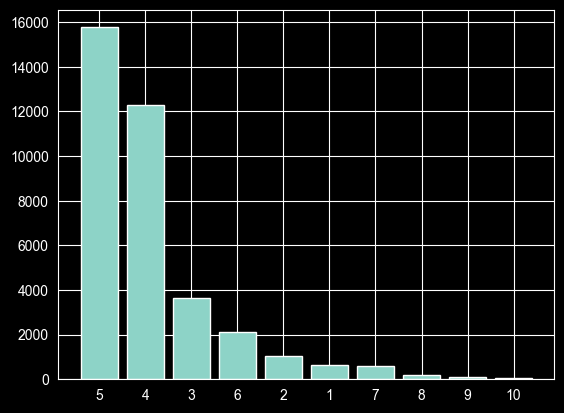

In [7]:
x = df['Số tầng'].value_counts()
plt.bar(x.keys()[:10], x[:10]);

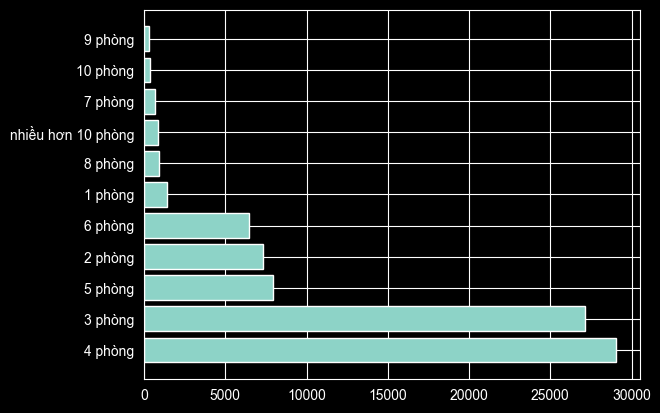

In [8]:
x = df['Số phòng ngủ'].value_counts()
plt.barh(x.keys(), x);

In [9]:
df["Ngày"] = pd.to_datetime(df["Ngày"])
df["Ngày"].dt.year.value_counts()

Ngày
2020.0    82478
2019.0       18
Name: count, dtype: int64

In [10]:
df["Ngày"] = df["Ngày"].astype(str)

In [11]:
df = df.rename(columns = {"Ngày":"date", "Địa chỉ":"address", "Quận":"district",
                                  "Huyện":"ward", "Loại hình nhà ở":"type_of_housing",
                                 "Giấy tờ pháp lý":"legal_paper", "Số tầng":"num_floors",
                                 "Số phòng ngủ":"num_bed_rooms", "Diện tích":"squared_meter_area",
                                 "Dài":"length_meter", "Rộng":"width_meter", "Giá/m2":"price_in_million_per_square_meter"})

In [12]:
df.head()

,Unnamed: 0,date,address,district,ward,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


In [13]:
df[df.duplicated(keep=False)]

,Unnamed: 0,date,address,district,ward,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter


In [14]:
df = df.drop("Unnamed: 0", axis = 1)
df = df.dropna()
df = df.reset_index()

# The total records of the dataset after dropping null values
print("The total records of the dataset are: ", str(len(df)), "records.")

The total records of the dataset are:  11473 records.


In [15]:
df.head()

,index,date,address,district,ward,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter
0,2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
1,15,2020-08-05,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52 m²,12 m,4.2 m,"93,27 triệu/m²"
2,24,2020-08-04,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90 m²,18 m,5 m,"108,89 triệu/m²"
3,29,2020-08-04,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32 m²,6.6 m,4.5 m,"60,94 triệu/m²"
4,34,2020-08-04,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42 m²,11 m,4 m,"29,76 triệu/m²"


In [16]:
df = df[df['num_floors'] != 'Nhiều hơn 10']
df = df[df['num_bed_rooms'] != 'nhiều hơn 10 phòng']

In [17]:
df['district'] = df['district'].str.replace('Quận ','').str.strip()
df['ward'] = df['ward'].str.replace('Phường ','').str.strip()
df['num_floors'] = df['num_floors'].str.strip().astype(float)
df['num_bed_rooms'] = df['num_bed_rooms'].str.replace(' phòng','').str.strip().astype(float)
df['squared_meter_area'] = df['squared_meter_area'].str.replace(' m²','').str.strip().astype(float)
df['length_meter'] = df['length_meter'].str.replace(' m','').str.strip().astype(float)
df['width_meter'] = df['width_meter'].str.replace(' m','').str.strip().astype(float)

In [18]:
df[["num_floors", "num_bed_rooms", "squared_meter_area", "length_meter", "width_meter"]]

,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter
0,4.0,4.0,40.0,10.0,4.0
1,5.0,4.0,52.0,12.0,4.2
2,5.0,5.0,90.0,18.0,5.0
3,4.0,3.0,32.0,6.6,4.5
4,3.0,2.0,42.0,11.0,4.0
...,...,...,...,...,...
11467,6.0,6.0,65.0,13.0,5.0
11468,2.0,2.0,37.0,13.0,3.0
11470,5.0,4.0,80.0,14.0,5.0
11471,3.0,5.0,89.0,20.0,4.0


Text(0.5, 0, 'Square meter (m2)')

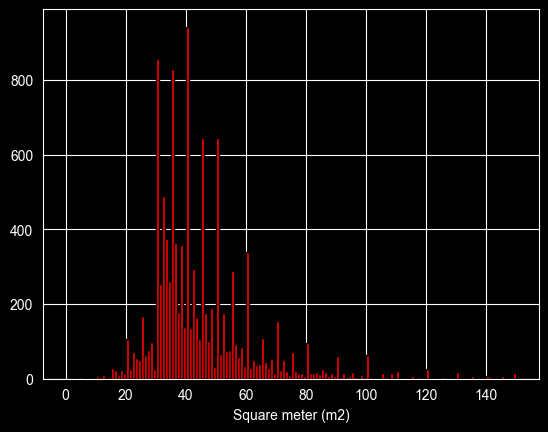

In [19]:
x = df['squared_meter_area']
plt.hist(x, edgecolor='black', color='red', bins=np.arange(0, 150+1))
plt.xlabel("Square meter (m2)")

In [20]:
df.groupby('price_in_million_per_square_meter').count()['date']

price_in_million_per_square_meter
1 triệu/m²           1
1 tỷ/m²              2
1,03 triệu/m²        1
1,033333333 tỷ/m²    1
1,05 triệu/m²        1
                    ..
99,75 triệu/m²       1
99,8 triệu/m²        1
99,83 triệu/m²       2
99,9 triệu/m²        1
99.415 đ/m²          1
Name: date, Length: 3174, dtype: int64

In [21]:
df.loc[df['price_in_million_per_square_meter'].str.contains(' tỷ/m²'), 'price_in_million_per_square_meter'] = df.loc[df['price_in_million_per_square_meter'].str.contains(' tỷ/m²'), 'price_in_million_per_square_meter'].str.replace(' tỷ/m²','').str.replace('.','').str.replace(',','.').astype(float) * 1000
df.loc[df['price_in_million_per_square_meter'].str.contains(' triệu/m²', na=False), 'price_in_million_per_square_meter'] = df.loc[df['price_in_million_per_square_meter'].str.contains(' triệu/m²', na=False), 'price_in_million_per_square_meter'].str.replace(' triệu/m²','').str.replace(',','.').astype(float)
df.loc[df['price_in_million_per_square_meter'].str.contains(' đ/m²', na=False), 'price_in_million_per_square_meter'] = df.loc[df['price_in_million_per_square_meter'].str.contains(' đ/m²', na=False), 'price_in_million_per_square_meter'].str.replace(' đ/m²','').str.replace('.','').astype(float) * 0.000001

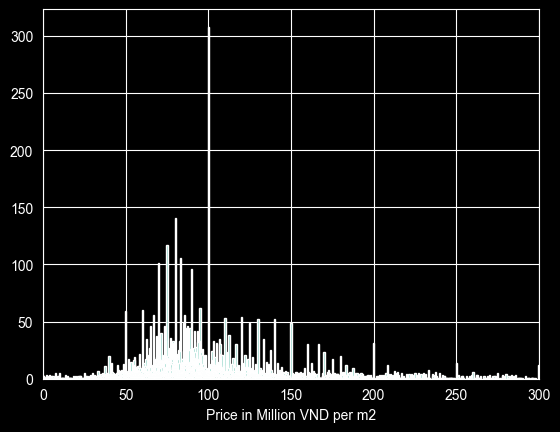

In [22]:
x = df['price_in_million_per_square_meter'].value_counts()
plt.bar(x.keys(), x);
plt.xlabel("Price in Million VND per m2")
plt.xlim([0, 300]);

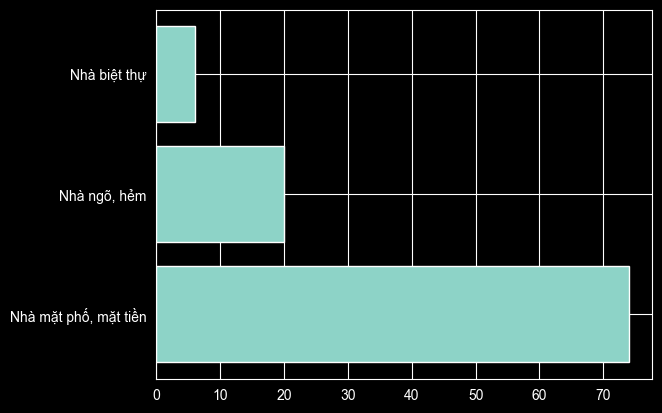

In [23]:
x = df['price_in_million_per_square_meter'].sort_values(ascending=False)[:100]
x = df['type_of_housing'][x.index].value_counts()
plt.barh(x.keys(), x);

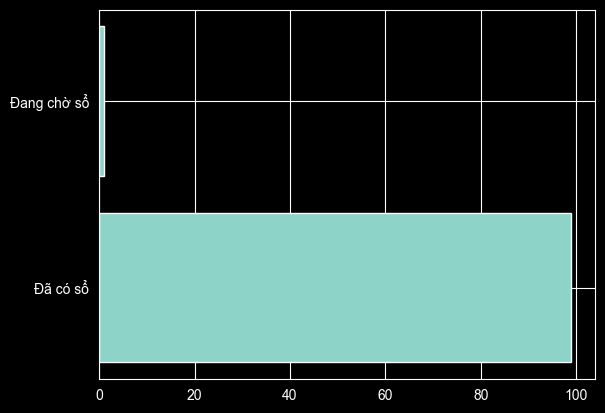

In [24]:
x = df['price_in_million_per_square_meter'].sort_values(ascending=False)[:100]
x = df['legal_paper'][x.index].value_counts()
plt.barh(x.keys(), x);

In [25]:
df[['address', 'district', 'price_in_million_per_square_meter']]

,address,district,price_in_million_per_square_meter
0,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,65.0
1,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Long Biên,93.27
2,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Hà Đông,108.89
3,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Nam Từ Liêm,60.94
4,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,29.76
...,...,...,...
11467,"Đường Ngụy Như Kon Tum, Phường Nhân Chính, Quậ...",Thanh Xuân,192.31
11468,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Hoàng Mai,43.24
11470,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Đống Đa,262.5
11471,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Đống Đa,258.43


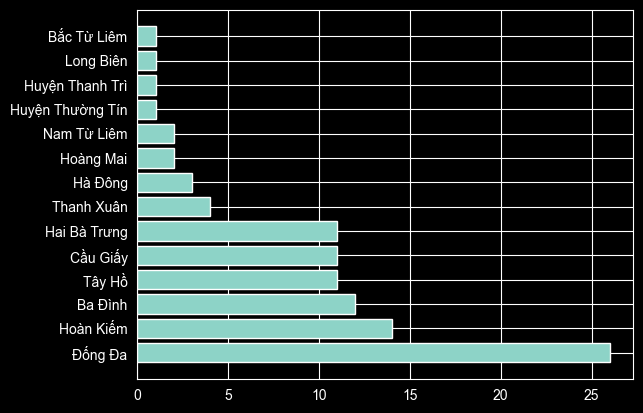

In [26]:
x = df['price_in_million_per_square_meter'].sort_values(ascending=False)[:100]
x = df['district'][x.index].value_counts()
plt.barh(x.keys(), x);

<Axes: ylabel='count'>

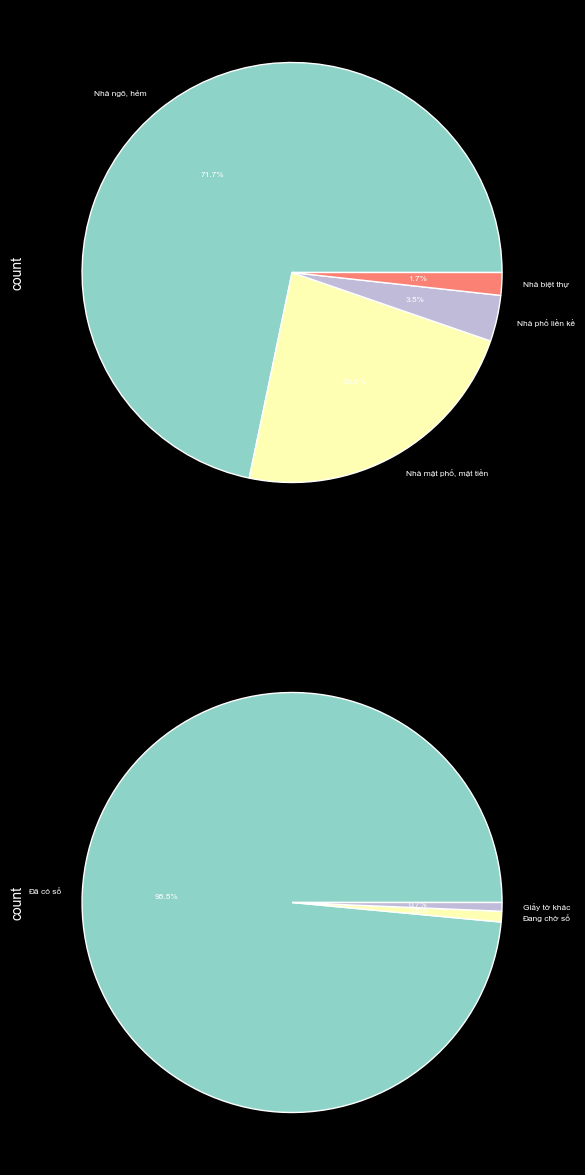

In [27]:
fig, axis = plt.subplots(2,1,figsize=(10,15))
fig.subplots_adjust(left=1, right=2, wspace=0.5)

df['type_of_housing'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axis[0], fontsize=6)
df['legal_paper'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axis[1], fontsize=6)

In [28]:
df.columns

Index(['index', 'date', 'address', 'district', 'ward', 'type_of_housing',
       'legal_paper', 'num_floors', 'num_bed_rooms', 'squared_meter_area',
       'length_meter', 'width_meter', 'price_in_million_per_square_meter'],
      dtype='object')

In [29]:
dummy_type_of_housing = pd.get_dummies(df.type_of_housing, prefix="housing_type")
dummy_legal_paper = pd.get_dummies(df.legal_paper, prefix="legal_paper")
dummy_district = pd.get_dummies(df.district, prefix="district")
dummy_ward = pd.get_dummies(df.ward, prefix="ward")

df_cleaned = pd.concat([df, dummy_type_of_housing, dummy_legal_paper, dummy_district, dummy_ward], axis=1)
df_cleaned = df_cleaned.drop(['index', 'date', 'address', 'district', 'ward', 'type_of_housing', 'legal_paper'], axis = 1)
df_cleaned.head()

,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâm,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,4.0,52.0,12.0,4.2,93.27,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,5.0,5.0,90.0,18.0,5.0,108.89,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,3.0,32.0,6.6,4.5,60.94,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,2.0,42.0,11.0,4.0,29.76,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
df_cleaned.columns

Index(['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter',
       'width_meter', 'price_in_million_per_square_meter',
       'housing_type_Nhà biệt thự', 'housing_type_Nhà mặt phố, mặt tiền',
       'housing_type_Nhà ngõ, hẻm', 'housing_type_Nhà phố liền kề',
       ...
       'ward_Đại Mỗ', 'ward_Định Công', 'ward_Đống Mác', 'ward_Đồng Mai',
       'ward_Đồng Nhân', 'ward_Đồng Tâm', 'ward_Đồng Xuân', 'ward_Đội Cấn',
       'ward_Đức Giang', 'ward_Đức Thắng'],
      dtype='object', length=281)

Removing outliers using IQR method

In [31]:
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final

removed_outliers = df_cleaned
columns_to_remove_outliers = ['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter',
                              'width_meter', 'price_in_million_per_square_meter']
for column in columns_to_remove_outliers:
    removed_outliers = remove_outlier_IQR(removed_outliers, column)

print("The final length of the dataset is", str(len(removed_outliers)), "rows.")

The final length of the dataset is 7328 rows.


Scale variables using Standard Scaler and create train-test set

In [32]:
removed_outliers.head()

,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâm,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,4.0,52.0,12.0,4.2,93.27,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,3.0,32.0,6.6,4.5,60.94,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,2.0,42.0,11.0,4.0,29.76,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,4.0,4.0,43.0,11.0,4.0,50.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
housing = removed_outliers

# Separate predictors and response (price) variables
X = housing.loc[:, (housing.columns != 'price_in_million_per_square_meter') & (housing.columns != 'date')]
y = housing[['price_in_million_per_square_meter']]
to_be_scaled = ['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter', 'width_meter']

# Initiate scaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

X_scaled = X
y_scaled = y

# Storing the fit object for reference and reverse the scaling later
PredictorScalerFit=PredictorScaler.fit(X_scaled[to_be_scaled])
TargetVarScalerFit=TargetVarScaler.fit(y_scaled)

# Generating the standardized values of X and y
X_scaled[to_be_scaled]=PredictorScalerFit.transform(X_scaled[to_be_scaled])
y_scaled=TargetVarScalerFit.transform(y)

X_array = np.array(X_scaled.values).astype("float32")
y_array = np.array(y_scaled).astype("float32")

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array,
                                                    test_size=0.2,
                                                    random_state=2023)

# Sanity check to see if all train and test arrays have correct dimensions
assert X_train.shape[0] == y_train.shape[0] and X_train.shape[1] == X_test.shape[1] and X_test.shape[0] == y_test.shape[0] and y_train.shape[1] == y_test.shape[1], \
"All train and test sets should have correct dimensions."

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5862, 280) (1466, 280) (5862, 1) (1466, 1)


Using Traditional Linear Regression in Statistics

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.4749706983566284


In [38]:
y_pred = model.intercept_ + np.sum(model.coef_ * X_test, axis=1)
print("The prediction of the statistical Linear Regression model:\n", y_pred)

The prediction of the statistical Linear Regression model:
 [ 0.477529    1.5617876   0.7515472  ... -0.40183556 -0.44810143
  0.49485457]


In [39]:
from sklearn.preprocessing import PolynomialFeatures
X_train_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_train_.shape

(5862, 39620)

In [40]:
new_model = LinearRegression()
new_model.fit(X_train_, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
r_sq = new_model.score(X_train_, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6035858392715454


Training a Machine Learning Model for Regression
Finding best parameters for the Neural Network using grid search

In [42]:
# Turn off TensorFlow messages and warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_SETTINGS"] = "false"

# Create the base model
def create_regression_NN():
    model = Sequential()
    model.add(Dense(units=10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Creathe a dictionary for trial parameters
NN_params = {'batch_size':[10, 20, 30, 50],
             'epochs':[10, 20, 50]}

NN_trial = KerasRegressor(create_regression_NN, verbose=1)

# Initiate the grid search and storing best parameters for later reference
NN_grid_search = GridSearchCV(estimator=NN_trial, param_grid=NN_params,
                               cv=3, n_jobs = -1).fit(X_train, y_train, verbose=1)
NN_best_params = NN_grid_search.best_params_

# Showing the best parameters
NN_best_params

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8227
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6023  
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5638  
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.5492
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.5410
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5359
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5320  
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5281  
Epoch 9/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5236
Epoch 10/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5217


{'batch_size': 20, 'epochs': 10}

Training the NN model with the best parameters

In [43]:
# Fitting the NN to the Training set
NN = Sequential()
NN.add(Dense(units=10, input_dim=X_train.shape[1],
                kernel_initializer='normal', activation='relu'))
NN.add(Dense(1, kernel_initializer='normal'))
NN.compile(loss='mean_squared_error', optimizer='adam')

NN.fit(X_train, y_train,
       batch_size = int(NN_best_params['batch_size']),
        epochs = int(NN_best_params['epochs']),
       verbose=1)

# Generating Predictions on testing data
NN_predictions = NN.predict(X_test)

# Scaling the predicted Price data back to original price scale
NN_predictions = TargetVarScalerFit.inverse_transform(NN_predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig = TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data = np.concatenate((PredictorScalerFit.inverse_transform(X_test[:,:5]), X_test[:,5:]), axis=1)

# Recreating the dataset, now with predicted price using the NN model
TestingData = pd.DataFrame(data=Test_Data, columns=X.columns)
TestingData['Price'] = y_test_orig
TestingData['NN_predictions'] = NN_predictions

TestingData[['Price', 'NN_predictions']].head()

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8302  
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6093
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5634
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5486  
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5408
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5337
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5300
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.5249
Epoch 9/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5216
Epoch 10/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5186
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Price,NN_predictions
0,85.709999,104.947868
1,138.369995,125.819801
2,132.000000,106.998260
3,125.639999,96.213524
4,110.190002,115.006874


Training a Random Forest model for Regression
Finding best parameters for the Random Forest model using random search and grid search

In [44]:
# Create a dictionary of random parameters for the model
RF_random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [45]:
# Turn off TensorFlow messages and warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_SETTINGS"] = "false"

# Create the base RF model and fit the random search
RF_regressor = RandomForestRegressor()
RF_random_search = RandomizedSearchCV(estimator=RF_regressor, param_distributions=RF_random_grid, n_iter=50, cv=2, verbose=1, random_state=2022, n_jobs = -1).fit(X_train, np.ravel(y_train))
RF_best_params = RF_random_search.best_params_
RF_best_params

Fitting 2 folds for each of 50 candidates, totalling 100 fits


{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': True}

In [46]:
# Narrowing the parameters grid based on the best parameters given by the random search, then feed the grid to a grid search
RF_param_grid = {'n_estimators': [RF_best_params['n_estimators']-100, RF_best_params['n_estimators']],
               'max_features': ['sqrt', 'log2'],
               'max_depth': [RF_best_params['max_depth'] - 10, RF_best_params['max_depth']],
               'min_samples_split': [5, 10],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

In [47]:
# Turn off TensorFlow messages and warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_SETTINGS"] = "false"

# Create another base RF model and fit the grid search
RF_regressor_2 = RandomForestRegressor()
RF_grid_search = GridSearchCV(estimator=RF_regressor_2, param_grid=RF_param_grid,
                              cv=2, n_jobs=-1, verbose=4).fit(X_train, np.ravel(y_train))

# Showing the best parameters
RF_grid_search.best_params_

Fitting 2 folds for each of 64 candidates, totalling 128 fits


{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

Testing the RF model with the best parameters

In [49]:
# Fitting a RF model with the best parameters
RF = RF_grid_search.best_estimator_

# Generating Predictions on testing data
RF_predictions = RF.predict(X_test)

# Scaling the predicted Price data back to original price scale
RF_predictions = TargetVarScalerFit.inverse_transform(np.resize(RF_predictions, (1466,1)))
TestingData['RF_predictions'] = RF_predictions

In [50]:
LR_predictions = model.predict(X_test)
LR_predictions = TargetVarScalerFit.inverse_transform(LR_predictions)
TestingData['LR_predictions'] = LR_predictions
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(LR_predictions, y_test))

np.float64(90.45388748814918)

In [51]:
X_test_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
X_test_.shape

(1466, 39620)

In [57]:
# Scaling the y_test Price data back to original price scale
y_test_orig = TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data = np.concatenate((PredictorScalerFit.inverse_transform(X_test[:,:5]), X_test[:,5:]), axis=1)

# Recreating the dataset, now with predicted price using the NN model
TestingData = pd.DataFrame(data=Test_Data, columns=X.columns)
TestingData['Price'] = y_test_orig
TestingData['NN_predictions'] = NN_predictions
TestingData['RF_predictions'] = RF_predictions
TestingData['LR_predictions'] = LR_predictions

In [58]:
PR_predictions = new_model.predict(X_test_)
PR_predictions = TargetVarScalerFit.inverse_transform(PR_predictions)
TestingData['PR_predictions'] = PR_predictions
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(PR_predictions, y_test))

np.float64(90.97642530313829)

In [59]:
TestingData['PR_predictions']

0       137.088638
1       138.667999
2       124.916679
3        90.513062
4       144.153946
           ...    
1461     98.011467
1462    121.499359
1463     74.388046
1464     78.596581
1465    100.423225
Name: PR_predictions, Length: 1466, dtype: float32

In [60]:
TestingData[['Price', 'NN_predictions', 'RF_predictions', 'LR_predictions']].head()

,Price,NN_predictions,RF_predictions,LR_predictions
0,85.709999,104.947868,113.632926,100.695068
1,138.369995,125.819801,128.644654,128.876236
2,132.000000,106.998260,104.668989,107.817131
3,125.639999,96.213524,84.460372,95.957016
4,110.190002,115.006874,107.530342,112.914902


Final result: Neural Network vs. Random Forest vs. Linear Regression

In [61]:
# Define a function evaluate the predictions
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return(100 - MAPE)

In [62]:
# Showing scores for both the NN and the RF model
print("Accuracy for the NN model is:", str(Accuracy_Score(TestingData['Price'], TestingData['NN_predictions'])))
print("Accuracy for the RF model is:", str(Accuracy_Score(TestingData['Price'], TestingData['RF_predictions'])))
print("Accuracy for the LR model is:", str(Accuracy_Score(TestingData['Price'], TestingData['LR_predictions'])))

Accuracy for the NN model is: 82.9579
Accuracy for the RF model is: 82.89568717520736
Accuracy for the LR model is: 82.63202


In [63]:
print("Accuracy for the PR model is:", str(Accuracy_Score(TestingData['Price'], TestingData['PR_predictions'])))

Accuracy for the PR model is: 81.86516


Đã lưu file model_comparison_results.csv


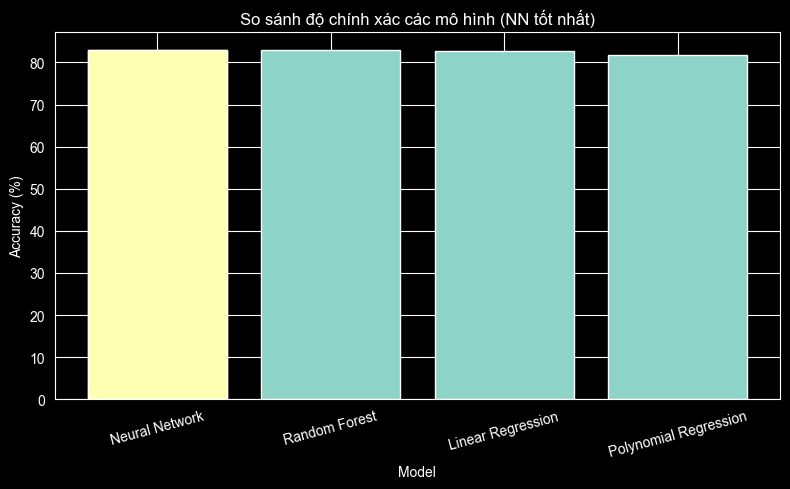

Đã lưu hình model_comparison_accuracy.png


In [64]:
# ==========================================
# MODEL COMPARISON + SAVE CSV & IMAGE
# NN MODEL IS THE BEST
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# --------- 1. TÍNH METRIC ----------
results = []

models = {
    "Neural Network": TestingData['NN_predictions'],
    "Random Forest": TestingData['RF_predictions'],
    "Linear Regression": TestingData['LR_predictions'],
    "Polynomial Regression": TestingData['PR_predictions']
}

y_true = TestingData['Price']

def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

for name, pred in models.items():
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    acc = Accuracy_Score(y_true, pred)
    results.append([name, rmse, acc])

comparison_df = pd.DataFrame(
    results,
    columns=["Model", "RMSE", "Accuracy (%)"]
).sort_values(by="Accuracy (%)", ascending=False)

# --------- 2. LƯU CSV ----------
comparison_df.to_csv("model_comparison_results.csv", index=False)

print("Đã lưu file model_comparison_results.csv")
comparison_df


# ==========================================
# VISUALIZATION + SAVE IMAGE
# ==========================================

plt.figure(figsize=(8,5))

plt.bar(
    comparison_df["Model"],
    comparison_df["Accuracy (%)"]
)

plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.title("So sánh độ chính xác các mô hình (NN tốt nhất)")
plt.xticks(rotation=15)

# Highlight NN model
nn_index = comparison_df[comparison_df["Model"] == "Neural Network"].index[0]
plt.bar(
    comparison_df.loc[nn_index, "Model"],
    comparison_df.loc[nn_index, "Accuracy (%)"]
)

plt.tight_layout()
plt.savefig("model_comparison_accuracy.png", dpi=300)
plt.show()

print("Đã lưu hình model_comparison_accuracy.png")
